In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def im_load(im):
    image = cv2.imread(im)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()
    return image

def preprocess_image(image):
    resized_image = cv2.resize(image, (416, 416))
    blob = cv2.dnn.blobFromImage(resized_image, 1 / 255.0, swapRB=True, crop=False)
    height, width = image.shape[:2]
    return blob, height, width

In [2]:
def network_object_detection(network, blob, height, width, confidence_threshold=0.5, nms_threshold=0.4):
    network.setInput(blob)
    output_layers_names = network.getUnconnectedOutLayersNames()
    layer_outputs = network.forward(output_layers_names)

    boxes = []
    confidences = []
    class_ids = []

    for output in layer_outputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]

            if confidence > confidence_threshold:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, confidence_threshold, nms_threshold)
    return boxes, class_ids, confidences, indexes



In [3]:
with open('coco.names', 'r') as f:
        classes = f.read().splitlines()

def show_box(image, boxes, class_ids, confidences, indexes):
    font = cv2.FONT_HERSHEY_PLAIN
    colors = np.random.uniform(0, 255, size=(len(boxes), 3))

    image1 = cv2.cvtColor(image, cv2.COLOR_RGBA2BGR)

    for i in indexes.flatten():
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        confi = str(confidences[i])
        color = colors[i]

        cv2.rectangle(image1, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.rectangle(image1, (x, y), (x + w, y - 25), (0, 255, 0), cv2.FILLED)
        cv2.putText(image1, label + " " + confi, (x, y + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
   
    plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))

classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

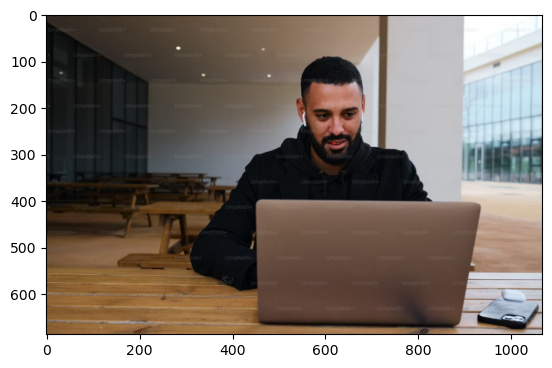

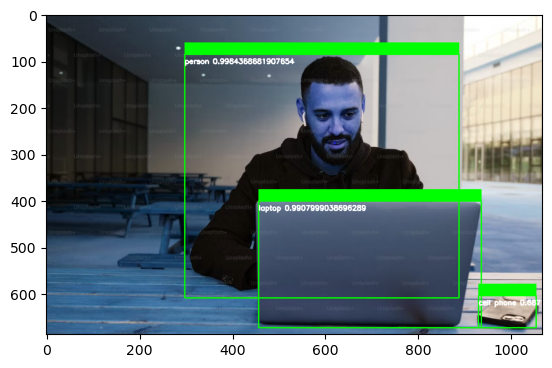

In [4]:
network = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

image = im_load('man_notebook.jpg')
blob, height, width = preprocess_image(image)
boxes, class_ids, confidences, indexes = network_object_detection(network, blob, height, width)

show_box(image, boxes, class_ids, confidences, indexes)

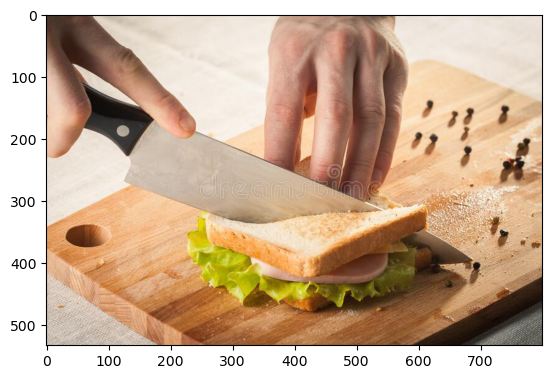

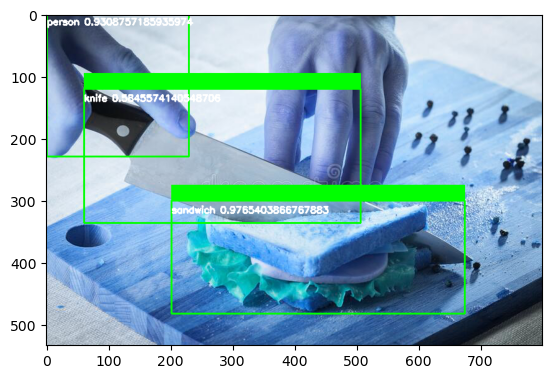

In [5]:
image = im_load(r'sandwich.jpg')
blob, height, width = preprocess_image(image)
boxes, class_ids, confidences, indexes = network_object_detection(network, blob, height, width)
show_box(image, boxes, class_ids, confidences, indexes)


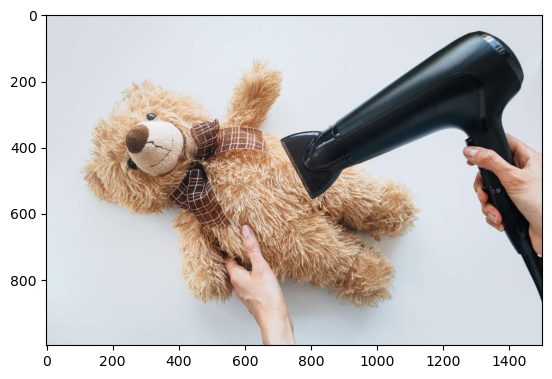

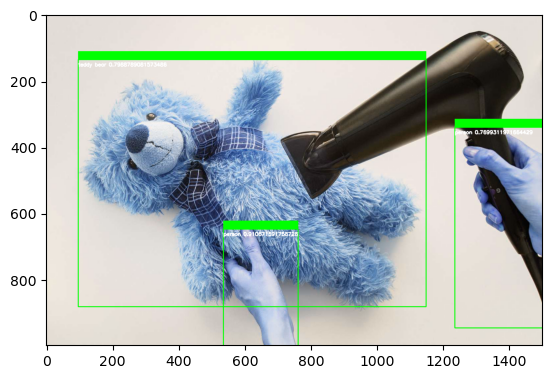

In [6]:
image = im_load(r'teddy.jpg')
blob, height, width = preprocess_image(image)
boxes, class_ids, confidences, indexes = network_object_detection(network, blob, height, width)
show_box(image, boxes, class_ids, confidences, indexes)


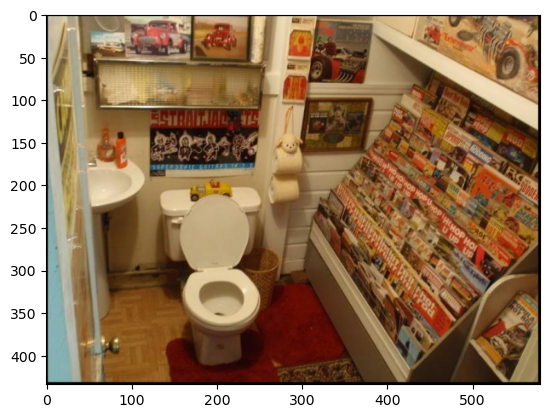

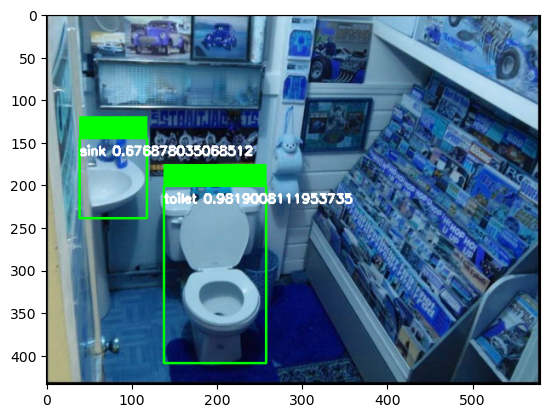

In [7]:
image = im_load(r'bathroom.jpg')
blob, height, width = preprocess_image(image)
boxes, class_ids, confidences, indexes = network_object_detection(network, blob, height, width)
show_box(image, boxes, class_ids, confidences, indexes)